<a href="https://colab.research.google.com/github/nicolemaracaja/lab_redes_crc_grupo10/blob/main/RC_Lab1_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grupo 10
- Jefferson Ribeiro Brasil - 123110470
- Giulia Leticia de Mesquita Aragão - 121210663
- Nicole Brito Maracajá - 123111413
- Heitor de Souza Alves - 123110811


# 1. Fundamentos

O CRC é utilizado como um mecanismo de controle na camada de enlace. É uma forma de conseguirmos verificar se existe um erro de transmissão dos bits.

Diferente dos métodos mais simples, como o bit de paridade (que apenas conta se o número de bits '1' é par ou ímpar), o CRC baseia-se na teoria da divisão polinomial.

### 1.1. Representação Polinomial

No CRC, tratamos os bits como coeficientes de um polinômio.

*   Uma mensagem 1101 torna-se *1x³ + 1x² + 0x¹ + 1x⁰*

Para o algoritmo funcionar, definimos um polinômio gerador G(x) fixo e a ideia central é garantir que o quadro transmitido seja divisível por esse gerador.

### 1.2. Algoritmo de Transmissão

O processo de cálculo no transmissor segue três passos:

**1.   Deslocamento (M(x) ⋅ 2ʳ):** Adicionam-se r bits 'O' ao final da mensagem original (em que r é o grau do gerador G(x));

**2.   Divisão Binária:** Divide-se a mensagem deslocada pelo gerador G(x);

**3. Resto:**  O resto dessa divisão, uma sequência de r bits, é o CRC.

### 1.3. Cálculo do CRC

Logo, a fórmula para o cálculo é:

*CRC = (M(x) ⋅ 2 ʳ) (mod G(x))*

E o quadro final a ser transmitido (T(x)) é a mensagem original com o CRC anexado:

*T(x) = M(x) ⋅ 2 ʳ + CRC*

Resumindo, o quadro transmitido é:

*T(x) = M(x) + CRC*

### 1.4. Verificação do CRC

O receptor recebe o quadro T(x) e o divide pelo mesmo polinômio gerador G(x) combinado no passo inicial. Pela propriedade da aritmética modular, se não houverem erros de transmissão, a divisão será exata.

Qualquer resto diferente de zero indica que o quadro recebido não é divisível por G(x), logo, um erro foi detectado.

# 2. Algoritmo

Nessa etapa, implementamos as equações do CRC, conforme as definições na seção 1. O desafio consiste em simular a divisão polinomial utilizando oprações bit a bit.

### 2.1. Implementação

In [ ]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).

    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).

    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) -1

    # 2. Crie T(x)=  M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)

    # 3. Implemente o loop de divisão.
    #    Percorra os bit original da mensagem (em uma janela), da esquerda para a direita.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - considere a janela atual como os próximos r+1 bits. (para pode dividir o por G(x))
        if mensagem_aumentada[i] == '1':
            janela_atual = "".join(mensagem_aumentada[i : i + len(gerador_bits)]) # inicio e fim devem calculados
            resultado_xor = xor_bits(janela_atual, gerador_bits)

            # Atualize a mensagem com o resultado do XOR.
            # - Substitua os bits correspondentes na mensagem pela saída do XOR,
            # ignorando o primeiro bit (que já foi processado).
            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto

### 2.2. Testes

In [ ]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
# Quadro T(x) a ser transmitido: dados_teste + crc_calculado

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010


#### 2.2.1. Resolvendo o problema

O exemplo acima foi feito de forma detalhada a partir do slide 48 da psta RCNA_05, e seguindo o passo a passo descrito, temos:

**Quadro** = 1101011111

| m = 10 (tamanho da mensagem)

**G(x)** = 10011

| r = 5 (tamanho do gerador)

**Grau do gerador** = O grau é calculdo como r - 1, onde 1 é o tamanho do gerador. Logo, o grau é 4.

Sabendo disso, vamos seguir os passos:

1. O primeiro passo que devemos aplicar é o deslocamento de bits, ampliando a mensagem.

- (M(x)⋅2⁴) -> 1101011111`0000`

2. Com a mensagem ampliada, calculamos o CRC, e para isso, alinhamos o gerador com o primeiro bit '1' e aplicammos a operação XOR sucessivamente.

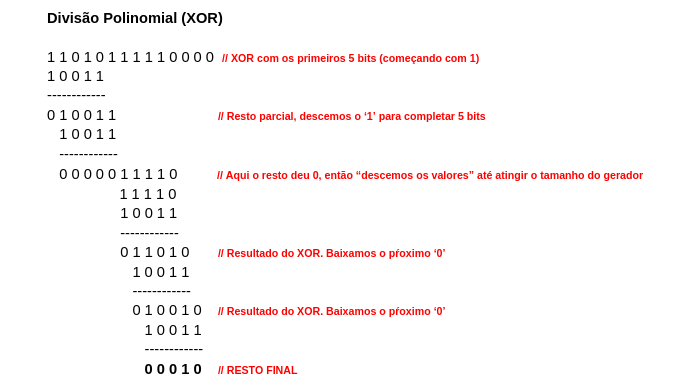

3. Assim, temos que o CRC é 0010, já que deve ser do tamanho de um grau menor que o divisor (4).

4. Logo, o quadro enviado será: 1101011111`0010`

5. Para verificar a veracidade, basta dividirmos o Quadro recebido pelo gerador (G(x)) e chegaremos que a divisão é exata.


# 3. Análise Comparativa de Desempenho

A etapa de análise tem como objetivo comparar o desempenho da **implementação manual (didática)** do cálculo do CRC em Python com uma **biblioteca padrão (`crc`)** otimizada, tipicamente implementada em linguagens de baixo nível (como C).

#### **3.1. Configuração do Ambiente de Teste**


Os testes foram executados em um **Notebook Lenovo Ideapad 3** com as seguintes configurações de hardware e software:

* **Processador:** **AMD Ryzen 5 5500U**
* **Memória RAM:** **8 GB**
* **Sistema Operacional:** **Windows 11**
* **Implementação Manual:** Baseada em **manipulação de strings binárias** (o que gera alto *overhead*).
* **Implementação Otimizada:** Biblioteca `crc` (utiliza código otimizado e operações bit a bit).

O desempenho foi medido para mensagens binárias com os seguintes tamanhos de *payload*: **1500 bytes (MTU)**, **4500 bytes**, e **9000 bytes (Jumbo Frame)**.

#

#### **3.2. Análise da Eficiência Temporal (Tempo de Execução)**

Ao analisar o **Gráfico 1** (gerado pelo código), observa-se uma disparidade massiva entre as duas implementações:

* **Implementação Manual (Curva Ascendente):** O tempo de execução da função `calcular_crc_manual` aumenta drasticamente conforme o tamanho da mensagem é elevado. Isso ocorre devido à inerente lentidão da **manipulação de strings em Python**. A cada passo da divisão polinomial, são criadas novas strings na memória, exigindo alto custo de processamento.
* **Implementação Otimizada (Curva Plana/Próxima de Zero):** A linha no gráfico permanece próxima de zero. Isso é resultado da utilização de código otimizado em C que executa **operações bitwise** diretamente no *hardware*, eliminando o *overhead* do interpretador Python.

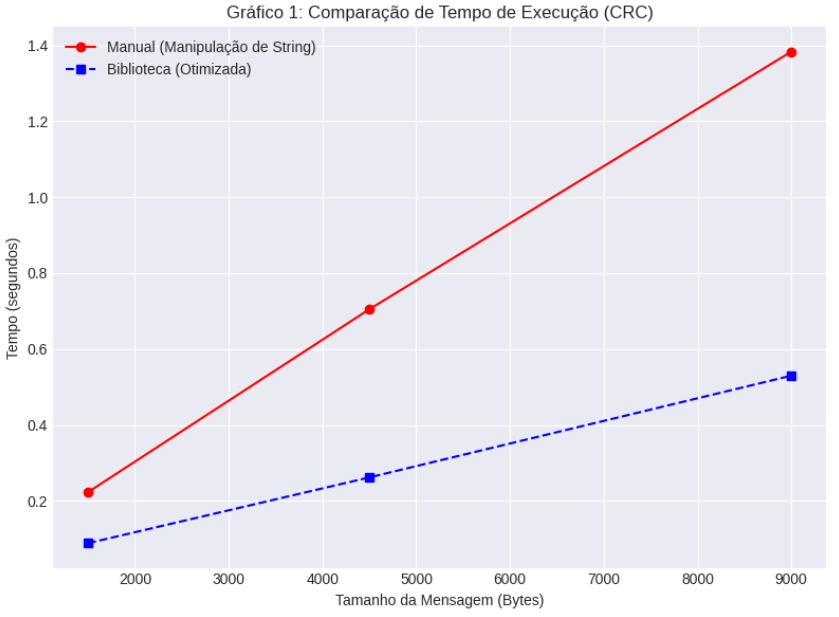

#

#### 3.3. Análise da Eficiência Espacial (Alocação de Memória)

O **Gráfico 2** (gerado pelo código) reforça a ineficiência espacial da abordagem didática:

* **Implementação Manual:** O pico de alocação de memória é significativamente maior, e **cresce de forma acentuada** com o tamanho da mensagem. O principal motivo é a **expansão de dados**: uma mensagem de $N$ bytes é convertida em uma *string* de $8 \cdot N$ caracteres, além do *overhead* do *Garbage Collector*.
* **Implementação Otimizada:** A alocação de memória é **mínima e constante**, pois a biblioteca processa os bytes diretamente, sem a custosa expansão para a representação textual em Python.

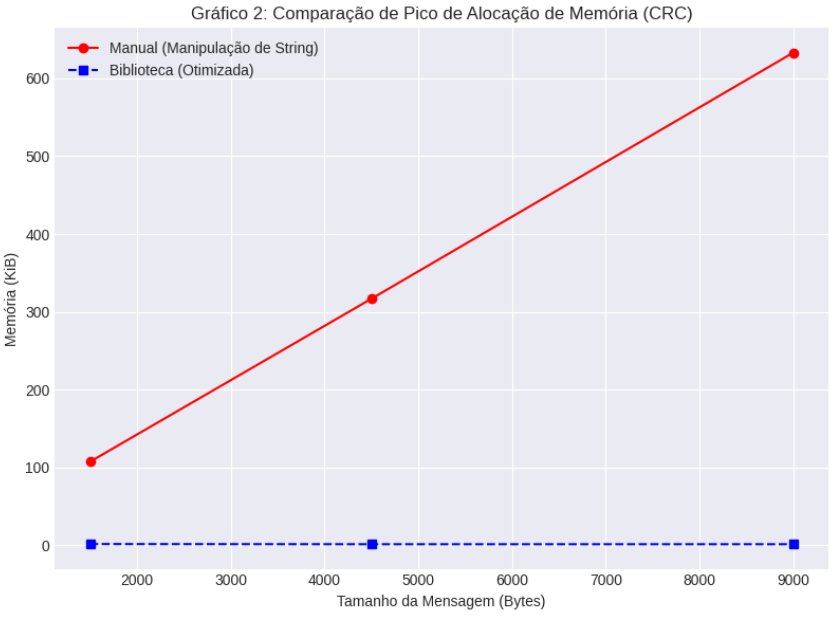

#

#### 3.4. Conclusão e Implicações Práticas

A comparação demonstra que a **implementação manual**, apesar de ser fundamental para a **compreensão didática** do algoritmo do CRC, não possui eficiência para o **uso prático** em redes de computadores. O *throughput* exigido em sistemas de comunicação só é atingido por implementações que utilizam operações bitwise otimizadas.

#### Código dos Gráficos abaixo:

--- Iniciando Benchmark ---
Sistema: Linux 6.6.105+
Processador (Ambiente Colab): Intel(R) Xeon(R) CPU @ 2.20GHz

---
Rodando testes (a implementação manual pode demorar um pouco)...
TAMANHO (bytes)    | TEMPO MANUAL (s)   | TEMPO LIB (s)     
----------------------------------------------------------------------------------------------------
1500               | 0.38068            | 0.15443644        
4500               | 1.23314            | 0.44038215        
9000               | 1.57742            | 0.50531818        

--- Gerando Gráficos ---


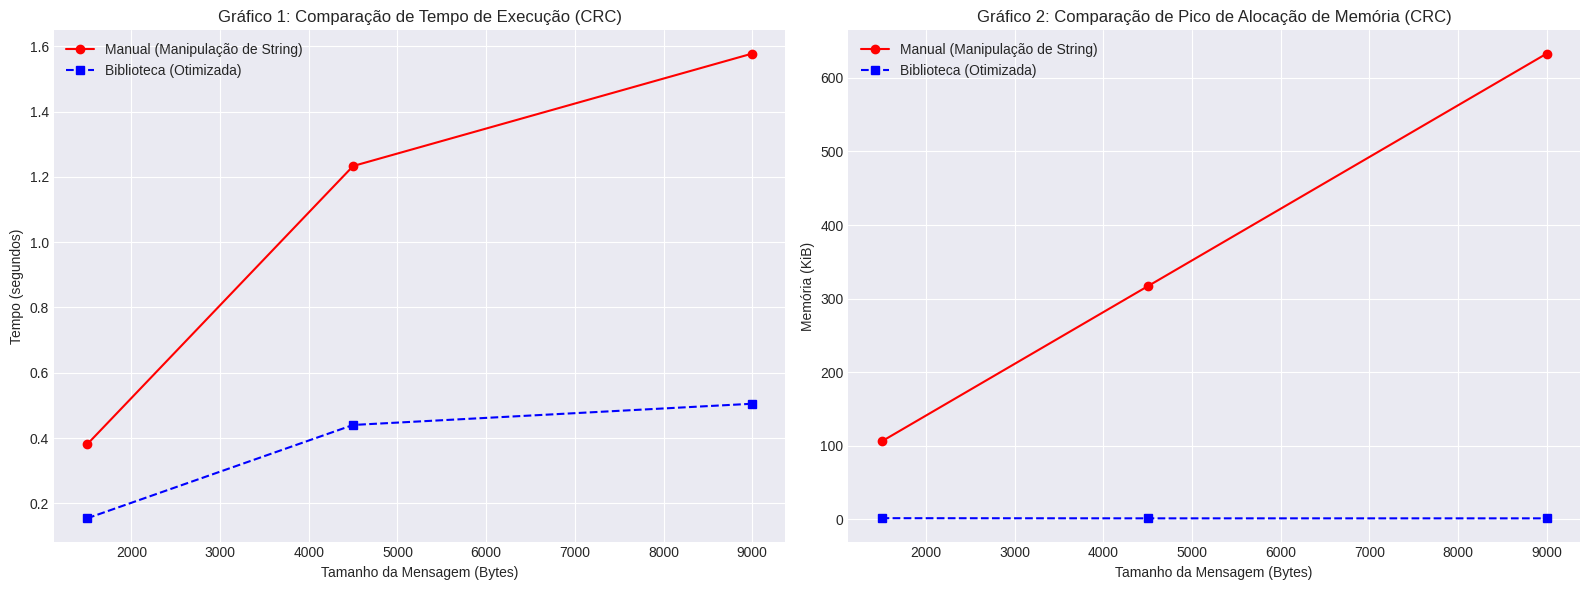


--- Benchmark Concluído ---


In [ ]:
!pip install crc

import time
import tracemalloc
import os
import matplotlib.pyplot as plt
import platform
import subprocess
from crc import Calculator, Crc16

def xor_bits(a, b):
    """Realiza XOR bit a bit entre duas strings binárias de mesmo comprimento."""
    resultado = []
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado.append('0')
        else:
            resultado.append('1')
    return "".join(resultado)

def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """Calcula o CRC via simulação de divisão polinomial em strings binárias."""
    r = len(gerador_bits) - 1
    mensagem_aumentada = list(dados_bits + '0' * r)
    len_dados = len(dados_bits)
    len_gerador = len(gerador_bits)

    for i in range(len_dados):
        if mensagem_aumentada[i] == '1':
            janela_atual_str = "".join(mensagem_aumentada[i : i + len_gerador])
            resultado_xor = xor_bits(janela_atual_str, gerador_bits)

            for j in range(len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]

    return "".join(mensagem_aumentada[-r:])

print("--- Iniciando Benchmark ---")

print(f"Sistema: {platform.system()} {platform.release()}")
try:
    model_name_output = subprocess.check_output("cat /proc/cpuinfo | grep 'model name' | uniq", shell=True).decode().strip()
    processor_name = model_name_output.replace('model name\t: ', '')
    print(f"Processador (Ambiente Colab): {processor_name}")
except Exception as e:
    print(f"Processador: Não foi possível identificar automaticamente. Erro: {e}")
print("\n---")

calculator_lib = Calculator(Crc16.MODBUS)
polinomio_manual = "11000000000000101"
tamanhos_bytes = [1500, 4500, 9000]

resultados = {
    "tamanhos": tamanhos_bytes,
    "tempo_manual": [], "tempo_lib": [],
    "mem_manual": [], "mem_lib": [] # Em KiB
}

print("Rodando testes (a implementação manual pode demorar um pouco)...")
print(f"{'TAMANHO (bytes)':<18} | {'TEMPO MANUAL (s)':<18} | {'TEMPO LIB (s)':<18}")
print("-" * 100)

for tamanho in tamanhos_bytes:
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)

    tracemalloc.start()
    t_start = time.perf_counter()
    _ = calcular_crc_manual(mensagem_bits, polinomio_manual)
    t_end = time.perf_counter()
    _, mem_peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    resultados["tempo_manual"].append(t_end - t_start)
    resultados["mem_manual"].append(mem_peak / 1024)

    tracemalloc.start()
    t_start = time.perf_counter()
    _ = calculator_lib.checksum(mensagem_bytes)
    t_end = time.perf_counter()
    _, mem_peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    resultados["tempo_lib"].append(t_end - t_start)
    resultados["mem_lib"].append(mem_peak / 1024)

    print(f"{tamanho:<18} | {resultados['tempo_manual'][-1]:<18.5f} | {resultados['tempo_lib'][-1]:<18.8f}")

print("\n--- Gerando Gráficos ---")

plt.style.use('seaborn-v0_8-darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Tempo
ax1.plot(resultados["tamanhos"], resultados["tempo_manual"], marker='o', linestyle='-', color='red', label='Manual (Manipulação de String)')
ax1.plot(resultados["tamanhos"], resultados["tempo_lib"], marker='s', linestyle='--', color='blue', label='Biblioteca (Otimizada)')
ax1.set_title('Gráfico 1: Comparação de Tempo de Execução (CRC)')
ax1.set_xlabel('Tamanho da Mensagem (Bytes)')
ax1.set_ylabel('Tempo (segundos)')
ax1.legend()

# Gráfico 2: Memória
ax2.plot(resultados["tamanhos"], resultados["mem_manual"], marker='o', linestyle='-', color='red', label='Manual (Manipulação de String)')
ax2.plot(resultados["tamanhos"], resultados["mem_lib"], marker='s', linestyle='--', color='blue', label='Biblioteca (Otimizada)')
ax2.set_title('Gráfico 2: Comparação de Pico de Alocação de Memória (CRC)')
ax2.set_xlabel('Tamanho da Mensagem (Bytes)')
ax2.set_ylabel('Memória (KiB)')
ax2.legend()

plt.tight_layout()
plt.show()

print("\n--- Benchmark Concluído ---")

# 4. Investigação dos Erros

## 4.1. Setup

In [ ]:
!pip install crc

import time
import tracemalloc
import os
import matplotlib.pyplot as plt
import platform
import subprocess
from crc import Calculator, Crc16

In [ ]:
# @title a) Mensagem Pessoal

MENSAGEM = "Heitor de Souza Alves"
MENSAGEM_BASE = "010010000110010101101001011101000110111101110010001000000110010001100101001000000101001101101111011101010111101001100001001000000100000101101100011101100110010101110011"

In [ ]:
# @title b) Gerador Pessoal

# Final 1 - MODBUS
MODBUS = "11000000000000101"

CRC = calcular_crc_manual(MENSAGEM_BASE, MODBUS)
print(CRC)

0110011000001101



| VARIAVEL              | VALOR |
|  :-                   |  :-   |
| `MENSAGEM`            |   Heitor de Souza Alves   |
| `MENSAGEM_BASE`       |   010010000110010101101001011101000110111101110010001000000110010001100101001000000101001101101111011101010111101001100001001000000100000101101100011101100110010101110011   |
| `CRC`                 |   0110011000001101   |

## 4.2. Report

In [ ]:
# @title Verificação do pacote sem adição de erros

calcular_crc_manual(MENSAGEM_BASE + CRC, MODBUS)

'0000000000000000'

In [ ]:
# @title Erros

import random
import pandas as pd

random.seed(42) # Geração dos mesmos testes em todas as execuções

resultados = []

for i in range(1, 11):

  CRC = calcular_crc_manual(MENSAGEM_BASE, MODBUS)
  QUADRO_TRANSMITIDO = MENSAGEM_BASE + CRC

  pos = random.randint(0, len(QUADRO_TRANSMITIDO) - 20)
  tamanho = random.randint(3, 16)
  erro = "".join("1" if random.random() > 0.5 else "0" for _ in range(tamanho))

  QUADRO_CORROMPIDO = (
      QUADRO_TRANSMITIDO[:pos] +
      xor_bits(QUADRO_TRANSMITIDO[pos:pos+tamanho], erro) +
      QUADRO_TRANSMITIDO[pos+tamanho:]
  )

  crc_manual = calcular_crc_manual(QUADRO_CORROMPIDO, MODBUS)

  calculator_lib = Calculator(Crc16.MODBUS)
  byte_len = (len(QUADRO_CORROMPIDO) + 7) // 8
  data = int(QUADRO_CORROMPIDO, 2).to_bytes(byte_len, byteorder="big")
  crc_value = calculator_lib.checksum(data)
  crc_lib = format(crc_value, "016b")

  det_manual = (crc_manual != "0" * (len(MODBUS) - 1))
  det_lib = (crc_lib != "0" * 16)

  resultados.append({
      "Teste": i,
      "Posição do Erro": pos,
      "Tamanho da Rajada": tamanho,
      "Padrão de Erro": erro,
      "CRC Manual": crc_manual,
      "CRC Biblioteca": crc_lib,
      "Detectado Manual": det_manual,
      "Detectado Biblioteca": det_lib
  })

df = pd.DataFrame(resultados)
df.style \
  .set_properties(**{'text-align': 'center'}) \
  .set_table_styles(
      [{'selector': 'th', 'props': [('text-align', 'center')]}]
  ) \
.hide(axis="index")


Teste,Posição do Erro,Tamanho da Rajada,Padrão de Erro,CRC Manual,CRC Biblioteca,Detectado Manual,Detectado Biblioteca
1,163,4,0001,1000000000101011,1111000100111111,True,True
2,139,4,1000,1000000000010010,1010000110011100,True,True
3,154,3,111,1110000000001001,0101000110010011,True,True
4,107,6,001100,1100000001111101,0010111001111110,True,True
5,71,5,01000,0000000010000011,0111000100011111,True,True
6,88,12,000010011000,1110001110111110,1110111100101011,True,True
7,58,15,000001000011101,1000100010100010,1110010101010000,True,True
8,41,10,0111111000,0000111100000110,0010100110100010,True,True
9,68,4,0110,0000011000010100,0011001100011000,True,True
10,127,9,110011101,0000010011010101,0011010000010011,True,True


Os CRCs são diferentes pois a biblioteca recebe o pacote como uma cadeia de Bytes e inverte cada byte recebido, além de refletir também o polinômio gerador.

### Ponto Cego

O CRC pode apresentar pontos cegos na identificação de erros que sejam múltiplos do polinômio gerador. Dessa forma, os erros para o ponto cego são gerados pela criação de cadeias que representam diferentes múltiplos de MODBUS e concatenação deles no final da MENSAGEM_BASE.

In [ ]:
# @title Pontos Cegos

import random
import pandas as pd

random.seed(42) # Geração dos mesmos testes em todas as execuções

pontos_cegos = []

for i in range(11):

  CRC = calcular_crc_manual(MENSAGEM_BASE, MODBUS)
  QUADRO_TRANSMITIDO = MENSAGEM_BASE + CRC

  pos = random.randint(0, len(QUADRO_TRANSMITIDO) - 20)
  tamanho = random.randint(3, 16)
  erro = MODBUS + "0" * i

  QUADRO_CORROMPIDO = QUADRO_TRANSMITIDO + erro

  crc_manual = calcular_crc_manual(QUADRO_CORROMPIDO, MODBUS)

  calculator_lib = Calculator(Crc16.MODBUS)
  byte_len = (len(QUADRO_CORROMPIDO) + 7) // 8
  data = int(QUADRO_CORROMPIDO, 2).to_bytes(byte_len, byteorder="big")
  crc_value = calculator_lib.checksum(data)
  crc_lib = format(crc_value, "016b")

  det_manual = (crc_manual != "0" * (len(MODBUS) - 1))
  det_lib = (crc_lib != "0" * 16)

  pontos_cegos.append({
      "Teste": i,
      "Posição do Erro": pos,
      "Tamanho da Rajada": tamanho,
      "Padrão de Erro": erro,
      "CRC Manual": crc_manual,
      "CRC Biblioteca": crc_lib,
      "Detectado Manual": det_manual,
      "Detectado Biblioteca": det_lib
  })

df = pd.DataFrame(pontos_cegos)
df.style \
  .set_properties(**{'text-align': 'center'}) \
  .set_table_styles(
      [{'selector': 'th', 'props': [('text-align', 'center')]}]
  ) \
.hide(axis="index")

Teste,Posição do Erro,Tamanho da Rajada,Padrão de Erro,CRC Manual,CRC Biblioteca,Detectado Manual,Detectado Biblioteca
0,163,4,11000000000000101,0000000000000000,0100101000101100,False,True
1,6,14,110000000000001010,0000000000000000,0001010101100100,False,True
2,70,6,1100000000000010100,0000000000000000,0100100001100101,False,True
3,57,5,11000000000000101000,0000000000000000,1000010001100101,False,True
4,26,13,110000000000001010000,0000000000000000,1100110001110001,False,True
5,139,4,1100000000000010100000,0000000000000000,0010010110110011,False,True
6,151,9,11000000000000101000000,0000000000000000,0001110010101011,False,True
7,8,3,110000000000001010000000,0000000000000000,1000001001110100,False,True
8,23,6,1100000000000010100000000,0000000000000000,1101110101001011,False,True
9,59,11,11000000000000101000000000,0000000000000000,1110101100010100,False,True
